In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data
df = pd.read_csv('large_employee_data.csv')
print("Original DataFrame Shape:", df.shape)
print("\nOriginal DataFrame Head:")
print(df.head())

Original DataFrame Shape: (1050, 5)

Original DataFrame Head:
    ID              Name  Age Department  Salary
0  497  Charlie Martinez   45         IT   39866
1  395       Diana Smith   49    Finance   73108
2  590       Diana Davis   41    Finance   76486
3  918     Charlie Jones   58         HR   36971
4  654  George Rodriguez   26  Marketing  103445


In [3]:
# 1. Feature Engineering - Label Encoding
def apply_label_encoding(data, columns):
    """
    Apply label encoding to specified columns
    """
    encoded_data = data.copy()
    encoders = {}
    
    for column in columns:
        le = LabelEncoder()
        encoded_data[f'{column}_label_encoded'] = le.fit_transform(encoded_data[column])
        encoders[column] = le
        
        # Print mapping for reference
        mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print(f"\nLabel Encoding mapping for {column}:")
        print(mapping)
    
    return encoded_data, encoders

In [4]:
# 2. Feature Engineering - One-Hot Encoding
def apply_onehot_encoding(data, columns):
    """
    Apply one-hot encoding to specified columns
    """
    # Using pandas get_dummies for simplicity
    encoded_data = data.copy()
    for column in columns:
        dummies = pd.get_dummies(encoded_data[column], prefix=column)
        encoded_data = pd.concat([encoded_data, dummies], axis=1)
    
    return encoded_data

In [5]:
# 3. Feature Scaling - Standardization
def apply_standardization(data, columns):
    """
    Apply standardization (z-score normalization)
    """
    scaled_data = data.copy()
    scaler = StandardScaler()
    
    scaled_data[columns] = scaler.fit_transform(scaled_data[columns])
    
    return scaled_data, scaler

In [6]:
# 4. Feature Scaling - Min-Max Normalization
def apply_normalization(data, columns):
    """
    Apply min-max normalization
    """
    scaled_data = data.copy()
    scaler = MinMaxScaler()
    
    scaled_data[columns] = scaler.fit_transform(scaled_data[columns])
    
    return scaled_data, scaler

In [49]:
# 5. Visualization function
def plot_distribution(data, column, title):
    """
    Plot distribution before and after scaling
    """
    plt.figure(figsize=(12, 4))
    
    plt.subplot(121)
    sns.histplot(data[column], kde=True)
    plt.title(f'Original {title}')
    
    plt.subplot(122)
    sns.histplot(data[f'{column}_scaled'], kde=True)
    plt.title(f'Scaled {title}')
    
    plt.tight_layout()
    plt.savefig(f'{column}_scaling_comparison.png')
    plt.plot()

In [8]:
# Apply the transformations
print("\n1. Applying Label Encoding")
categorical_columns = ['Department', 'Name']
df_label_encoded, label_encoders = apply_label_encoding(df, categorical_columns)


1. Applying Label Encoding

Label Encoding mapping for Department:
{'Finance': 0, 'HR': 1, 'IT': 2, 'Marketing': 3, 'Operations': 4, 'Sales': 5}

Label Encoding mapping for Name:
{'Alice Brown': 0, 'Alice Davis': 1, 'Alice Garcia': 2, 'Alice Johnson': 3, 'Alice Jones': 4, 'Alice Martinez': 5, 'Alice Miller': 6, 'Alice Rodriguez': 7, 'Alice Smith': 8, 'Alice Williams': 9, 'Bob Brown': 10, 'Bob Davis': 11, 'Bob Garcia': 12, 'Bob Johnson': 13, 'Bob Jones': 14, 'Bob Martinez': 15, 'Bob Miller': 16, 'Bob Rodriguez': 17, 'Bob Smith': 18, 'Charlie Brown': 19, 'Charlie Davis': 20, 'Charlie Garcia': 21, 'Charlie Johnson': 22, 'Charlie Jones': 23, 'Charlie Martinez': 24, 'Charlie Miller': 25, 'Charlie Rodriguez': 26, 'Charlie Smith': 27, 'Charlie Williams': 28, 'Diana Brown': 29, 'Diana Davis': 30, 'Diana Garcia': 31, 'Diana Johnson': 32, 'Diana Jones': 33, 'Diana Martinez': 34, 'Diana Miller': 35, 'Diana Rodriguez': 36, 'Diana Smith': 37, 'Diana Williams': 38, 'Ethan Brown': 39, 'Ethan Davis':

In [9]:
print("\n2. Applying One-Hot Encoding")
df_onehot = apply_onehot_encoding(df, ['Department'])  # One-hot encoding for Department only


2. Applying One-Hot Encoding


In [10]:
print("\n3. Applying Standardization")
numeric_columns = ['Age', 'Salary']
df_standardized, standard_scaler = apply_standardization(df, numeric_columns)


3. Applying Standardization


In [11]:
print("\n4. Applying Normalization")
df_normalized, minmax_scaler = apply_normalization(df, numeric_columns)


4. Applying Normalization


In [12]:
# Create visualization of scaling effects
for column in numeric_columns:
    # For standardization
    df_viz = pd.DataFrame()
    df_viz[column] = df[column]
    df_viz[f'{column}_scaled'] = df_standardized[column]
    plot_distribution(df_viz, column, f'{column} (Standardized)')
    
    # For normalization
    df_viz[f'{column}_scaled'] = df_normalized[column]
    plot_distribution(df_viz, column, f'{column} (Normalized)')

In [13]:
# Combine different encoding methods
df_final = df.copy()

In [14]:
# Add label encoded columns
for column in categorical_columns:
    df_final[f'{column}_label_encoded'] = df_label_encoded[f'{column}_label_encoded']

In [15]:
# Add one-hot encoded columns for Department
department_dummies = pd.get_dummies(df['Department'], prefix='Department')
df_final = pd.concat([df_final, department_dummies], axis=1)

In [16]:
# Add standardized numeric columns
for column in numeric_columns:
    df_final[f'{column}_standardized'] = df_standardized[column]
    df_final[f'{column}_normalized'] = df_normalized[column]

In [17]:
# Save the processed data
df_final.to_csv('processed_features.csv', index=False)

In [18]:
# Print sample of final dataset
print("\nFinal DataFrame Sample:")
print(df_final.head())
print("\nFinal DataFrame Shape:", df_final.shape)


Final DataFrame Sample:
    ID              Name  Age Department  Salary  Department_label_encoded  \
0  497  Charlie Martinez   45         IT   39866                         2   
1  395       Diana Smith   49    Finance   73108                         0   
2  590       Diana Davis   41    Finance   76486                         0   
3  918     Charlie Jones   58         HR   36971                         1   
4  654  George Rodriguez   26  Marketing  103445                         3   

   Name_label_encoded  Department_Finance  Department_HR  Department_IT  \
0                  24               False          False           True   
1                  37                True          False          False   
2                  30                True          False          False   
3                  23               False           True          False   
4                  66               False          False          False   

   Department_Marketing  Department_Operations  Departm

In [19]:
# Generate summary statistics
print("\nSummary Statistics for Scaled Numeric Features:")
scaled_columns = [col for col in df_final.columns if 'standardized' in col or 'normalized' in col]
print(df_final[scaled_columns].describe())


Summary Statistics for Scaled Numeric Features:
       Age_standardized  Age_normalized  Salary_standardized  \
count      1.050000e+03     1050.000000         1.050000e+03   
mean      -2.706829e-17        0.501111        -1.454921e-16   
std        1.000477e+00        0.295782         1.000477e+00   
min       -1.695000e+00        0.000000        -1.666422e+00   
25%       -8.896468e-01        0.238095        -8.445922e-01   
50%        7.677700e-02        0.523810        -3.516680e-02   
75%        8.821302e-01        0.761905         8.458276e-01   
max        1.687483e+00        1.000000         1.833293e+00   

       Salary_normalized  
count        1050.000000  
mean            0.476159  
std             0.285874  
min             0.000000  
25%             0.234828  
50%             0.466111  
75%             0.717844  
max             1.000000  


[]

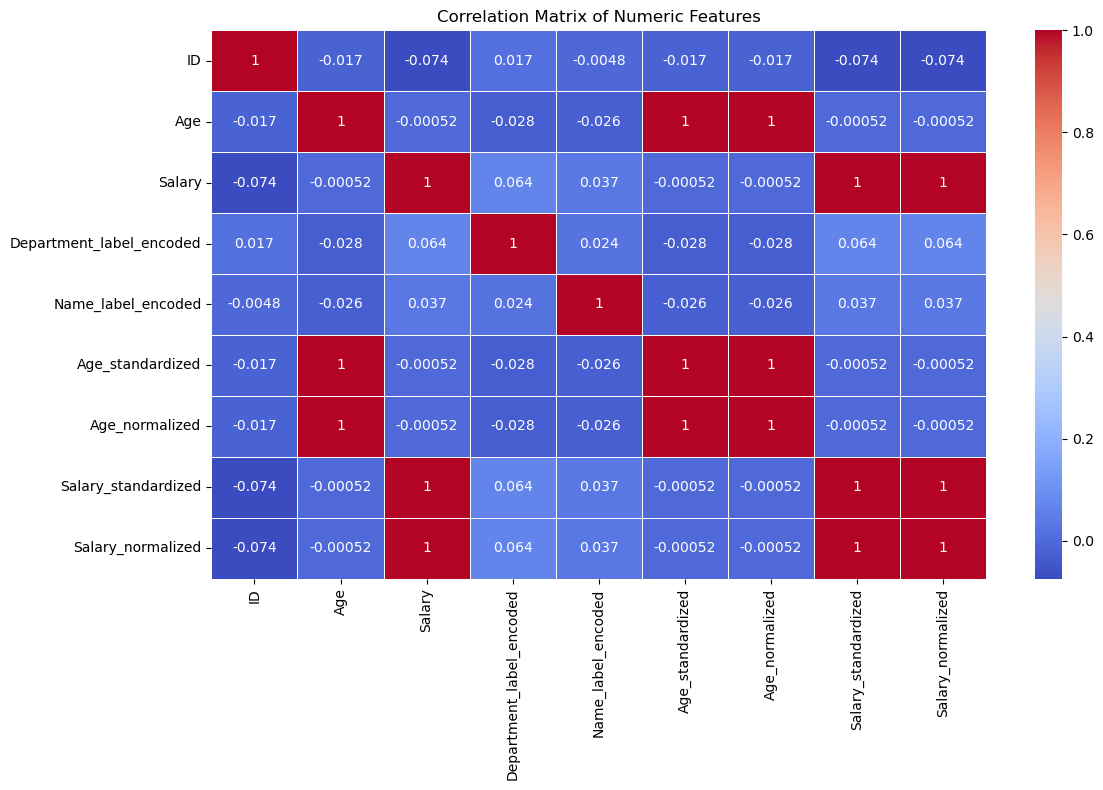

In [51]:
# Correlation analysis
plt.figure(figsize=(12, 8))
numeric_cols = df_final.select_dtypes(include=[np.number]).columns
correlation_matrix = df_final[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.plot()

In [21]:
print("\nProcessing complete! Output files:")
print("1. processed_features.csv - Contains all engineered features")
print("2. *_scaling_comparison.png - Distribution visualizations")
print("3. correlation_matrix.png - Correlation heatmap")


Processing complete! Output files:
1. processed_features.csv - Contains all engineered features
2. *_scaling_comparison.png - Distribution visualizations
3. correlation_matrix.png - Correlation heatmap


In [22]:
# Example of how to use the transformed data
print("\nExample usage of transformed features:")
print("\n1. Label Encoded Features:")
print(df_final[['Department', 'Department_label_encoded']].head())


Example usage of transformed features:

1. Label Encoded Features:
  Department  Department_label_encoded
0         IT                         2
1    Finance                         0
2    Finance                         0
3         HR                         1
4  Marketing                         3


In [23]:
print("\n2. One-Hot Encoded Features:")
print(df_final[[col for col in df_final.columns if 'Department_' in col and col != 'Department_label_encoded']].head())


2. One-Hot Encoded Features:
   Department_Finance  Department_HR  Department_IT  Department_Marketing  \
0               False          False           True                 False   
1                True          False          False                 False   
2                True          False          False                 False   
3               False           True          False                 False   
4               False          False          False                  True   

   Department_Operations  Department_Sales  
0                  False             False  
1                  False             False  
2                  False             False  
3                  False             False  
4                  False             False  


In [24]:
print("\n3. Scaled Features:")
print(df_final[[
    'Age', 'Age_standardized', 'Age_normalized',
    'Salary', 'Salary_standardized', 'Salary_normalized'
]].head())


3. Scaled Features:
   Age  Age_standardized  Age_normalized  Salary  Salary_standardized  \
0   45          0.157312        0.547619   39866            -1.287893   
1   49          0.479454        0.642857   73108             0.008795   
2   41         -0.164829        0.452381   76486             0.140562   
3   58          1.204271        0.857143   36971            -1.400820   
4   26         -1.372859        0.095238  103445             1.192166   

   Salary_normalized  
0           0.108160  
1           0.478672  
2           0.516323  
3           0.075893  
4           0.816806  
